# Breast Cancer – Cohort Analysis Assignment

Before we start with the analysis, let's understand what type of data and dataset we have been provided to do the Cohort Analysis

## Data Dictionary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 


In [2]:
# Load the Data Dictionary
data_dict_df = pd.read_excel('data/Data_Dictionary.xlsx')

# Display the first few rows and dataset info
data_dict_df.head()

,Field name,Data item,Data format,Notes
0,PATIENTID,Pseudonymised patient ID,Integer,NaN
1,GENDER,Person stated gender,Character,Consult z_gender in all_z_lookup_tables.csv fo...
2,ETHNICITY,Ethnicity,Character,Consult z_ethnicity in all_z_lookup_tables.csv...
3,DECEASED,Indicates if the Patient has deceased,Character,NaN
4,DEATHCAUSECODE_1A,As provided with death notification,Character,Codes are in ICD-10 format and may be a comma-...


The Data Dictionary provides a brief description of the fields in the datasets given:

- PATIENTID: Pseudonymized patient ID.
- GENDER: Person-stated gender (character format).
- ETHNICITY: Ethnicity (character format).
- DECEASED: Indicates if the patient has deceased.
- DEATHCAUSECODE_1A: Death cause code (in ICD-10 format).

This dictionary offers brief descriptions, but for further understanding of some variables like ETHNICITY we need to Look up dataset

## Lookup Table

In [3]:
# Load the Lookup Tables
lookup_tables_df = pd.read_excel('data/Lookup_Tables.xlsx')

# Display the first few rows and dataset info
lookup_tables_df.head()

,Code,Description
0,1,Hospital
1,2,"Hospice NOS, NHS hospice / specialist palliati..."
2,3,Voluntary hospice / specialist palliative care...
3,4,"Other private residence (e.g. relatives home, ..."
4,5,"Care home, care home with nursing, nursing home"


The Lookup Tables dataset contains columns like Code and Description. This appears to be a reference table with codes for various descriptions (e.g., DEATHLOCATIONCODE, CANCERCAREPLANINTENT, etc.).

This dataset is a reference table to interpret codes in the other datasets.

# Exploratory Data Analysis (EDA)


It is a critical initial step to inspect, summarize, and visualize data to uncover trends, patterns, and relationships. Here’s a breakdown on how to performed EDA for the given dataset before performing any cohort operations on the data.

1. Data Inspection (checking for missing values, data types, etc.)
2. Data Cleaning (handling missing values, correcting data types, etc.)
3. Univariate Analysis (distribution of individual variables)
4. Bivariate Analysis (relationships between variables)
5. Visualizations

## Patients Dataset

In [4]:
# Load the datasets
patients_df = pd.read_csv('data/Patients.csv')

# Display the first few rows of the dataset
patients_df.head()

,PATIENTID,GENDER,ETHNICITY,DECEASED,DEATHCAUSECODE_1A,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE
0,10273711,1,NaN,N,NaN,NaN,A,5/7/2022
1,10275818,1,A,Y,K566,4,D,20/10/2021
2,10276182,1,A,Y,J189,1,D,18/7/2020
3,10277943,1,A,N,NaN,NaN,A,5/7/2022
4,10279280,1,A,Y,C19,4,D,31/7/2022


### Patients dataset inspection

The Patients dataset contains columns such as PATIENTID, GENDER, ETHNICITY, DECEASED, DEATHCAUSECODE_1A, DEATHLOCATIONCODE, and VITALSTATUS.

In [5]:
# Checking for missing values and basic statistics in the Patients dataset
patients_missing = patients_df.isnull().sum()

patients_missing

PATIENTID                 0
GENDER                    0
ETHNICITY              2595
DECEASED                  0
DEATHCAUSECODE_1A    149252
DEATHLOCATIONCODE    149257
VITALSTATUS               0
VITALSTATUSDATE          31
dtype: int64

#### Patients Dataset Insights

- Missing Values:   
     - ETHNICITY: 2595 missing values.
     - DEATHCAUSECODE_1A and DEATHLOCATIONCODE: A large number of missing values (149,252 and 149,257 respectively).
     - VITALSTATUSDATE: 31 missing values.

In [6]:
patients_stats = patients_df.describe()

patients_stats

,PATIENTID,GENDER
count,1.812410e+05,181241.000000
mean,4.418893e+07,1.979701
std,2.565673e+07,0.141021
min,1.027371e+07,1.000000
25%,4.004336e+07,2.000000
50%,4.008867e+07,2.000000
75%,4.013398e+07,2.000000
max,2.500023e+08,2.000000


- Statistical Overview:
    - GENDER is coded as either 1 or 2 (male and female).

### Cleaning Patients Dataset

Handling missing values:

- For ETHNICITY: replacing missing values with mode. DEATHCAUSECODE_1A and DEATHLOCATIONCODE have many missing values, these columns can be dropped.
- Converting VITALSTATUSDATE to a proper date format.

In [7]:
# Cleaning the Patients dataset

# 1. Handle missing values for 'ETHNICITY' by imputing with the mode (most common ethnicity) 
# or dropping rows if necessary
patients_df['ETHNICITY'].fillna(patients_df['ETHNICITY'].mode()[0], inplace=True)

# 2. Handle missing values for 'DEATHCAUSECODE_1A' and 'DEATHLOCATIONCODE' by dropping them
patients_df.drop(columns=['DEATHCAUSECODE_1A', 'DEATHLOCATIONCODE'], inplace=True)

# 3. Convert 'VITALSTATUSDATE' to datetime
patients_df['VITALSTATUSDATE'] = pd.to_datetime(patients_df['VITALSTATUSDATE'], errors='coerce')

# Checking the result after cleaning
patients_missing_after = patients_df.isnull().sum()

# Preview the cleaned dataset
patients_df.head()

,PATIENTID,GENDER,ETHNICITY,DECEASED,VITALSTATUS,VITALSTATUSDATE
0,10273711,1,A,N,A,2022-05-07
1,10275818,1,A,Y,D,2021-10-20
2,10276182,1,A,Y,D,2020-07-18
3,10277943,1,A,N,A,2022-05-07
4,10279280,1,A,Y,D,2022-07-31


In [8]:
patients_missing_after

PATIENTID           0
GENDER              0
ETHNICITY           0
DECEASED            0
VITALSTATUS         0
VITALSTATUSDATE    31
dtype: int64

In [9]:
# Filling missing values in 'VITALSTATUSDATE' with the mode (most common date)
patients_df['VITALSTATUSDATE'].fillna(patients_df['VITALSTATUSDATE'].mode()[0], inplace=True)

# Checking if missing values are resolved
patients_missing_after_final = patients_df.isnull().sum()

# Preview the cleaned dataset
patients_missing_after_final


PATIENTID          0
GENDER             0
ETHNICITY          0
DECEASED           0
VITALSTATUS        0
VITALSTATUSDATE    0
dtype: int64

### Univariate Analysis

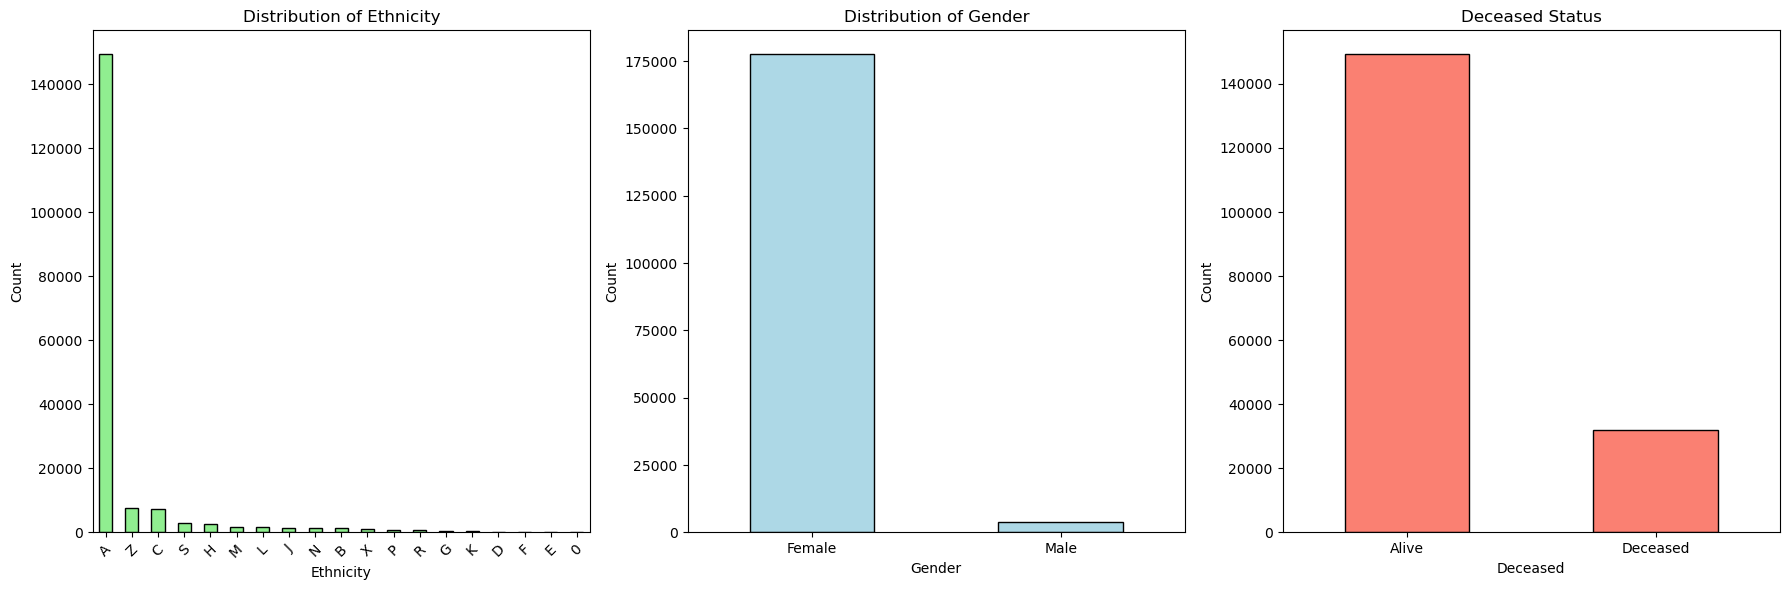

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the distribution of 'ETHNICITY'
patients_df['ETHNICITY'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Ethnicity')
axes[0].set_xlabel('Ethnicity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the distribution of 'GENDER'
patients_df['GENDER'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Female', 'Male'], rotation=0)

# Plotting the distribution of 'DECEASED'
patients_df['DECEASED'].value_counts().plot(kind='bar', color='salmon', edgecolor='black', ax=axes[2])
axes[2].set_title('Deceased Status')
axes[2].set_xlabel('Deceased')
axes[2].set_ylabel('Count')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Alive', 'Deceased'], rotation=0)

# Display all plots in one show
plt.tight_layout()
plt.show()


Univariate analyses for the Patients dataset:

- Ethnicity: The distribution of ethnicity shows a variety of ethnic groups, with some categories having more patients than others (category A).
- Gender: The dataset shows a higher number of female patients compared to males.
- Deceased Status: A significant portion of patients are alive, with fewer deceased individuals.

### Bivariate Analysis

<Figure size 800x600 with 0 Axes>

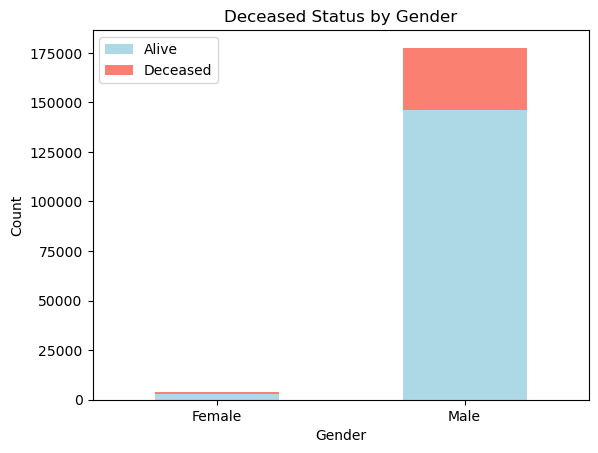

<Figure size 1000x600 with 0 Axes>

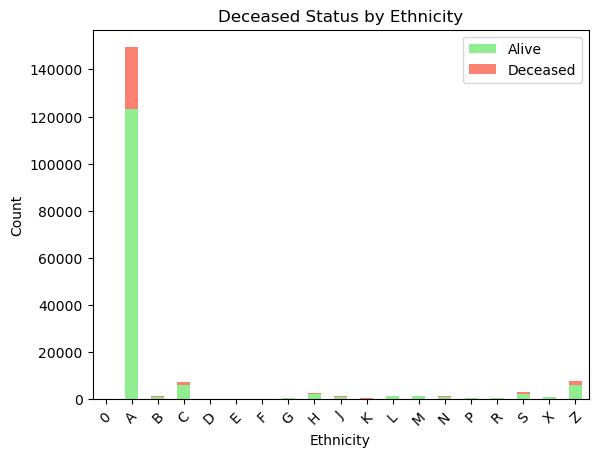

In [11]:
# Bivariate analysis for Patients dataset

# Plotting the relationship between 'GENDER' and 'DECEASED' status
plt.figure(figsize=(8, 6))
patients_df.groupby('GENDER')['DECEASED'].value_counts().unstack().plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Deceased Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(['Alive', 'Deceased'])
plt.show()

# Plotting the relationship between 'ETHNICITY' and 'DECEASED' status
plt.figure(figsize=(10, 6))
patients_df.groupby('ETHNICITY')['DECEASED'].value_counts().unstack().plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Deceased Status by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Alive', 'Deceased'])
plt.show()


Bivariate analyses for the Patients dataset:

- Deceased Status by Gender: The distribution shows a higher number of deceased patients among males, though there are deceased individuals in both gender categories.
- Deceased Status by Ethnicity: The analysis highlights varying deceased rates across different ethnic groups, with some ethnicities having a higher proportion of deceased patients compared to others.

## Diagnosis dataset

In [12]:
# Load the Diagnosis dataset
diagnosis_df = pd.read_csv('data/Diagnosis.csv') 

# Display the first few rows and dataset info
diagnosis_df.head()

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,ER_STATUS,PR_STATUS,HER2_STATUS,QUINTILE_2019,DATE_FIRST_SURGERY,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CHRL_TOT_27_03,COMORBIDITIES_27_03
0,10300617,2/11/2019,C50 (Breast Cancer),2,0,1b,3A,G3,46,P,P,N,2,30/11/2019,NaN,NaN,0.0,NaN
1,10300637,5/6/2018,C50 (Breast Cancer),NaN,NaN,NaN,?,G1,87,P,NaN,N,4,NaN,Z,NaN,0.0,NaN
2,10300641,26/1/2019,C50 (Breast Cancer),1c,0,0,1A,G2,87,NaN,NaN,NaN,1 - most deprived,NaN,Z,4.0,0.0,NaN
3,10300713,9/12/2017,C50 (Breast Cancer),2,0,0,2A,G2,74,U,NaN,N,5 - least deprived,13/2/2018,C,9.0,0.0,NaN
4,10300729,21/7/2019,C50 (Breast Cancer),3,1,0,2B,G3,71,NaN,NaN,P,3,19/8/2019,NaN,2.0,0.0,NaN


### Diagnosis dataset Inspection

The Diagnosis dataset contains columns like PATIENTID, DIAGNOSISDATEBEST, SITE_ICD10_O2_3CHAR, T_BEST, N_BEST, M_BEST, and STAGE_BEST, among others.

In [13]:
# Checking for missing values and basic statistics in the Diagnosis dataset
diagnosis_missing = diagnosis_df.isnull().sum()

diagnosis_missing

PATIENTID                    0
DIAGNOSISDATEBEST            0
SITE_ICD10_O2_3CHAR          0
T_BEST                   15822
N_BEST                   18166
M_BEST                   54278
STAGE_BEST                   1
GRADE                        0
AGE                          0
ER_STATUS                20966
PR_STATUS                72271
HER2_STATUS              33578
QUINTILE_2019                0
DATE_FIRST_SURGERY       28433
CANCERCAREPLANINTENT     68044
PERFORMANCESTATUS        72370
CHRL_TOT_27_03              70
COMORBIDITIES_27_03     161141
dtype: int64

#### Diagnosis Dataset Insights:

- Missing Values:
    - A significant number of missing values in columns like T_BEST, N_BEST, M_BEST, ER_STATUS, PR_STATUS, HER2_STATUS, DATE_FIRST_SURGERY, CANCERCAREPLANINTENT, PERFORMANCESTATUS, COMORBIDITIES_27_03.
    - T_BEST, N_BEST, and M_BEST have a large proportion of missing values (15,822, 18,166, and 54,278, respectively).
    - ER_STATUS, PR_STATUS, and HER2_STATUS are also missing for a significant number of patients(20966, 72271 and 33578 respectively).


In [14]:
diagnosis_stats = diagnosis_df.describe()

diagnosis_stats

,PATIENTID,AGE,PERFORMANCESTATUS,CHRL_TOT_27_03
count,1.872040e+05,187204.000000,114834.000000,187134.000000
mean,4.419510e+07,63.588353,1.432372,0.262454
std,2.565689e+07,14.650625,2.962318,0.800744
min,1.027371e+07,0.000000,0.000000,0.000000
25%,4.004183e+07,52.000000,0.000000,0.000000
50%,4.008606e+07,64.000000,0.000000,0.000000
75%,4.013286e+07,74.000000,1.000000,0.000000
max,2.500023e+08,106.000000,9.000000,11.000000


- Statistical Overview:
    - The average AGE of patients is 63.6 years, with the minimum age being 0 (which may indicate a data error) and a maximum age of 106.
    - PERFORMANCESTATUS ranges from 0 to 9, with most values around 0, indicating that the majority of patients have a lower performance status.
    - CHRL_TOT_27_03 has a mean of 0.26, but no significant values are provided in the statistical summary.

### Cleaning the Diagnosis dataset

Handling missing values:

- Columns with excessive missing values (like T_BEST, N_BEST, M_BEST, etc.) were dropped.
- The AGE column was cleaned to remove any invalid age values (like age 0).
- DATE_FIRST_SURGERY and DIAGNOSISDATEBEST were successfully converted to datetime formats.

In [15]:
# Cleaning the Diagnosis dataset

# 1. Handle missing values for 'T_BEST', 'N_BEST', 'M_BEST', 'ER_STATUS', 'PR_STATUS',
# 'HER2_STATUS', 'DATE_FIRST_SURGERY', 'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS', 'COMORBIDITIES_27_03'
# Drop columns with excessive missing values
diagnosis_df.drop(columns=['T_BEST', 'N_BEST', 'M_BEST', 'ER_STATUS', 'PR_STATUS',
                           'HER2_STATUS', 'CANCERCAREPLANINTENT', 'COMORBIDITIES_27_03'], inplace=True)

# 2. Handle missing values for 'DATE_FIRST_SURGERY' by imputing with the mode (most common date)
diagnosis_df['DATE_FIRST_SURGERY'].fillna(diagnosis_df['DATE_FIRST_SURGERY'].mode()[0], inplace=True)

# 3. Correct data errors (e.g., age being 0)
diagnosis_df['AGE'] = diagnosis_df['AGE'].apply(lambda x: x if x > 0 else None)

# 4. Convert 'DIAGNOSISDATEBEST' and 'DATE_FIRST_SURGERY' to datetime format
diagnosis_df['DIAGNOSISDATEBEST'] = pd.to_datetime(diagnosis_df['DIAGNOSISDATEBEST'], errors='coerce')
diagnosis_df['DATE_FIRST_SURGERY'] = pd.to_datetime(diagnosis_df['DATE_FIRST_SURGERY'], errors='coerce')

# Checking the result after cleaning
diagnosis_missing_after = diagnosis_df.isnull().sum()

diagnosis_df.head()

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,STAGE_BEST,GRADE,AGE,QUINTILE_2019,DATE_FIRST_SURGERY,PERFORMANCESTATUS,CHRL_TOT_27_03
0,10300617,2019-02-11,C50 (Breast Cancer),3A,G3,46.0,2,2019-11-30,NaN,0.0
1,10300637,2018-05-06,C50 (Breast Cancer),?,G1,87.0,4,2017-06-14,NaN,0.0
2,10300641,2019-01-26,C50 (Breast Cancer),1A,G2,87.0,1 - most deprived,2017-06-14,4.0,0.0
3,10300713,2017-09-12,C50 (Breast Cancer),2A,G2,74.0,5 - least deprived,2018-02-13,9.0,0.0
4,10300729,2019-07-21,C50 (Breast Cancer),2B,G3,71.0,3,2019-08-19,2.0,0.0


In [16]:
diagnosis_missing_after

PATIENTID                  0
DIAGNOSISDATEBEST          0
SITE_ICD10_O2_3CHAR        0
STAGE_BEST                 1
GRADE                      0
AGE                        1
QUINTILE_2019              0
DATE_FIRST_SURGERY         0
PERFORMANCESTATUS      72370
CHRL_TOT_27_03            70
dtype: int64

In [17]:
# Replace "?" with NaN in the STAGE_BEST column
diagnosis_df['STAGE_BEST'] = diagnosis_df['STAGE_BEST'].replace('?', pd.NA)
diagnosis_df['STAGE_BEST'].fillna(diagnosis_df['STAGE_BEST'].mode()[0], inplace=True)

# Handle missing values for numerical columns by filling with the median
numerical_columns = ['AGE', 'PERFORMANCESTATUS', 'CHRL_TOT_27_03']
for col in numerical_columns:
    diagnosis_df[col] = diagnosis_df[col].fillna(diagnosis_df[col].median())

# Check for any remaining missing values
diagnosis_df.isnull().sum()

PATIENTID              0
DIAGNOSISDATEBEST      0
SITE_ICD10_O2_3CHAR    0
STAGE_BEST             0
GRADE                  0
AGE                    0
QUINTILE_2019          0
DATE_FIRST_SURGERY     0
PERFORMANCESTATUS      0
CHRL_TOT_27_03         0
dtype: int64

### Univariate analysis

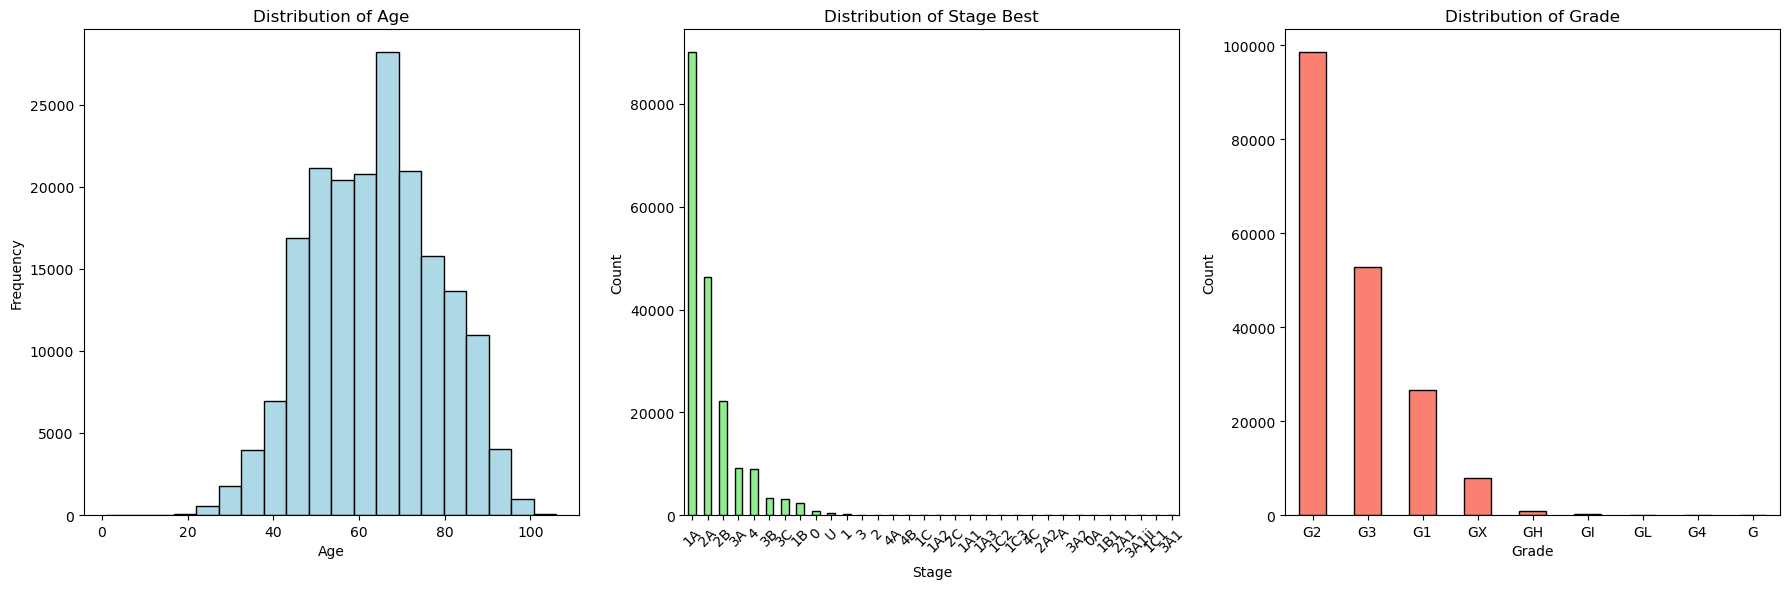

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the distribution of 'AGE'
axes[0].hist(diagnosis_df['AGE'].dropna(), bins=20, color='lightblue', edgecolor='black')
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plotting the distribution of 'STAGE_BEST'
diagnosis_df['STAGE_BEST'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Stage Best')
axes[1].set_xlabel('Stage')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the distribution of 'GRADE'
diagnosis_df['GRADE'].value_counts().plot(kind='bar', color='salmon', edgecolor='black', ax=axes[2])
axes[2].set_title('Distribution of Grade')
axes[2].set_xlabel('Grade')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=0)

# Display all plots in one show
plt.tight_layout()
plt.show()


Univariate analyses for the Diagnosis dataset:

- AGE: The distribution of patient ages shows that most patients are between 50 and 80 years old, with fewer patients in the extreme age ranges and it is normally distributed.
- STAGE_BEST: The distribution of STAGE_BEST indicates that most patients fall into stages 1A and 2A, with fewer patients in stages 2B and 3A.
- GRADE: The majority of patients have a grade of G2 or G3, with fewer patients having grade G1.

### Bivariate analysis

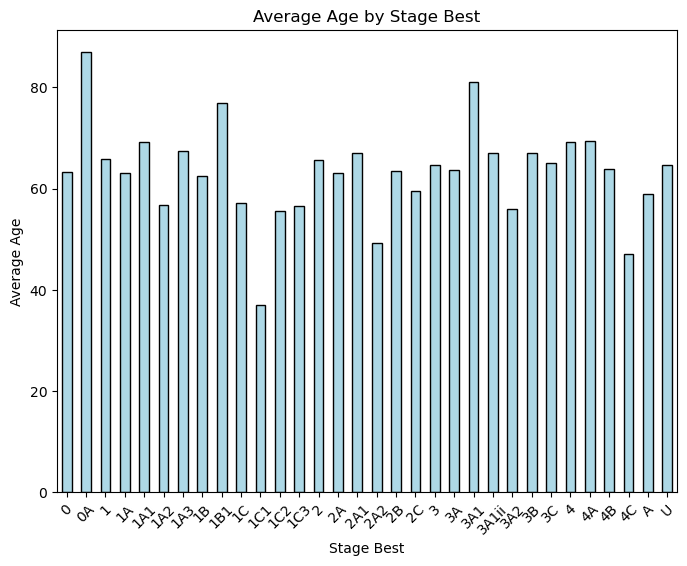

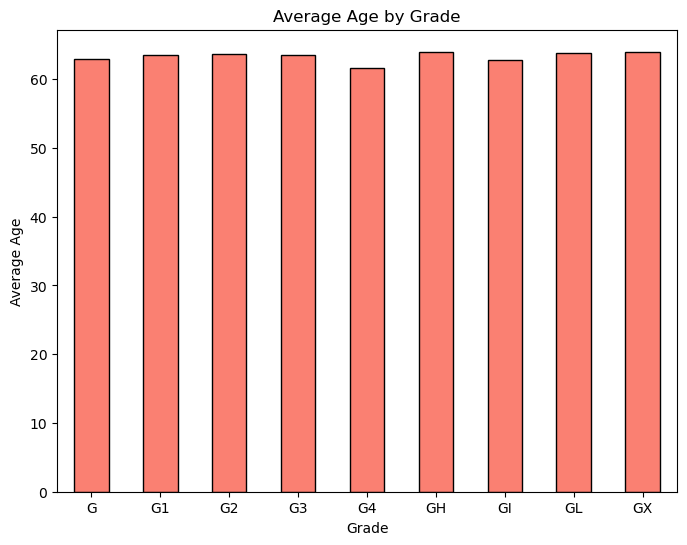

In [19]:
# Bivariate analysis for Diagnosis dataset

# Plotting the relationship between 'AGE' and 'STAGE_BEST'
plt.figure(figsize=(8, 6))
diagnosis_df.groupby('STAGE_BEST')['AGE'].mean().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Age by Stage Best')
plt.xlabel('Stage Best')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

# Plotting the relationship between 'AGE' and 'GRADE'
plt.figure(figsize=(8, 6))
diagnosis_df.groupby('GRADE')['AGE'].mean().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Age by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()


Bivariate analyses for the Diagnosis dataset:

- Average Age by Stage Best: The average age tends to increase with the stage of cancer, with older patients being in more advanced stages (e.g., Stage 3A).
- Average Age by Grade: Nearly all of the patients are over 60 Patients,meaning higher-grade cancer tend to be older ages on average compared to those with lower age group.

## Treatment Dataset

In [20]:
# Load the datasets
treatment_df = pd.read_csv('data/Treatment.csv')

# Display the first few rows of the dataset
treatment_df.head()

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP
0,10282626,1.60,NaN,NaN,18/9/2017,NaN,NaN,CISPLATIN + GEMCITABINE
1,10291762,1.53,46.95,NaN,8/3/2020,NaN,NaN,CAPECITABINE + MITOMYCIN
2,10292545,NaN,72.20,NaN,9/12/2017,NaN,N,IMATINIB
3,10293472,1.64,67.20,NaN,25/8/2017,NaN,N,TRIAL UNSPECIFIED
4,10297710,1.57,102.00,2/7/2016,8/8/2016,2,N,CISPLATIN


### Treatment Dataset Inspection

It contains information like ENCORE_PATIENT_ID, HEIGHT_AT_START_OF_REGIMEN, WEIGHT_AT_START_OF_REGIMEN, DATE_DECISION_TO_TREAT, and CLINICAL_TRIAL.

In [21]:
# Checking for missing values and basic statistics
treatment_missing = treatment_df.isnull().sum()

treatment_missing

ENCORE_PATIENT_ID                 0
HEIGHT_AT_START_OF_REGIMEN     8074
WEIGHT_AT_START_OF_REGIMEN     7457
DATE_DECISION_TO_TREAT        10260
START_DATE_OF_REGIMEN           188
CLINICAL_TRIAL                 6066
CHEMO_RADIATION               37829
BENCHMARK_GROUP                   0
dtype: int64

#### Treatment Dataset Insights:

- Missing Values: 
    - There are significant amounts of missing data in columns like HEIGHT_AT_START_OF_REGIMEN, WEIGHT_AT_START_OF_REGIMEN, DATE_DECISION_TO_TREAT, CLINICAL_TRIAL, and CHEMO_RADIATION. For example, HEIGHT_AT_START_OF_REGIMEN has 8074 missing values, and DATE_DECISION_TO_TREAT has 10260 missing entries.
    - CHEMO_RADIATION has a notably high number of missing values (37829).

In [22]:
treatment_stats = treatment_df.describe()

treatment_stats

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN
count,1.478050e+05,139731.000000,140348.000000
mean,4.571148e+07,1.795778,73.760354
std,2.947940e+07,5.596770,19.999812
min,1.027582e+07,0.000000,0.000000
25%,4.011997e+07,1.580000,62.300000
50%,4.014531e+07,1.620000,72.000000
75%,4.016010e+07,1.670000,84.000000
max,2.500023e+08,176.500000,999.000000


- Statistical Overview:
    - Heights(HEIGHT_AT_START_OF_REGIMEN) range from 0 (which may be a data error) to 176.5 cm, with a mean around 1.80 meters.
    - Weights(WEIGHT_AT_START_OF_REGIMEN) range from 0 to 999 kg (which also suggests data issues), with a mean weight of 73.76 kg.
    - START_DATE_OF_REGIMEN and CLINICAL_TRIAL also contain missing values but are relatively more complete.

### Cleaning the Treatment dataset

handling missing values:

- HEIGHT_AT_START_OF_REGIMEN and WEIGHT_AT_START_OF_REGIMEN will be replaced by mean.
- For categorical columns like CHEMO_RADIATION, CLINICAL_TRIAL using mode( most common).
- Check for outliers and handle them (e.g., HEIGHT and WEIGHT columns).
- Convert the date columns (e.g., DATE_DECISION_TO_TREAT and START_DATE_OF_REGIMEN) to proper date formats.

In [23]:
# 1. Handle missing values for numerical columns by imputing with median
treatment_df['HEIGHT_AT_START_OF_REGIMEN'].fillna(treatment_df['HEIGHT_AT_START_OF_REGIMEN'].mean(), inplace=True)
treatment_df['WEIGHT_AT_START_OF_REGIMEN'].fillna(treatment_df['WEIGHT_AT_START_OF_REGIMEN'].mean(), inplace=True)

# 2. Impute or drop missing values for categorical columns
treatment_df['CLINICAL_TRIAL'].fillna(treatment_df['CLINICAL_TRIAL'].mode()[0], inplace=True)
treatment_df['CHEMO_RADIATION'].fillna(treatment_df['CHEMO_RADIATION'].mode()[0], inplace=True)
treatment_df['DATE_DECISION_TO_TREAT'].fillna(treatment_df['DATE_DECISION_TO_TREAT'].mode()[0], inplace=True)

# 3. Convert date columns to datetime
treatment_df['START_DATE_OF_REGIMEN'] = pd.to_datetime(treatment_df['START_DATE_OF_REGIMEN'], errors='coerce')
treatment_df['DATE_DECISION_TO_TREAT'] = pd.to_datetime(treatment_df['DATE_DECISION_TO_TREAT'], errors='coerce')

# Checking the result after cleaning
treatment_missing_after = treatment_df.isnull().sum()
treatment_df.head()

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP
0,10282626,1.600000,73.760354,2019-06-15,2017-09-18,2,N,CISPLATIN + GEMCITABINE
1,10291762,1.530000,46.950000,2019-06-15,2020-08-03,2,N,CAPECITABINE + MITOMYCIN
2,10292545,1.795778,72.200000,2019-06-15,2017-09-12,2,N,IMATINIB
3,10293472,1.640000,67.200000,2019-06-15,2017-08-25,2,N,TRIAL UNSPECIFIED
4,10297710,1.570000,102.000000,2016-02-07,2016-08-08,2,N,CISPLATIN


In [24]:
treatment_missing_after

ENCORE_PATIENT_ID               0
HEIGHT_AT_START_OF_REGIMEN      0
WEIGHT_AT_START_OF_REGIMEN      0
DATE_DECISION_TO_TREAT          0
START_DATE_OF_REGIMEN         188
CLINICAL_TRIAL                  0
CHEMO_RADIATION                 0
BENCHMARK_GROUP                 0
dtype: int64

In [25]:
# Filling missing values in START_DATE_OF_REGIMEN with the mode (most common date)
treatment_df['START_DATE_OF_REGIMEN'].fillna(treatment_df['START_DATE_OF_REGIMEN'].mode()[0], inplace=True)

# Checking if missing values are resolved
treatment_missing_after_final = treatment_df.isnull().sum()

treatment_missing_after_final

ENCORE_PATIENT_ID             0
HEIGHT_AT_START_OF_REGIMEN    0
WEIGHT_AT_START_OF_REGIMEN    0
DATE_DECISION_TO_TREAT        0
START_DATE_OF_REGIMEN         0
CLINICAL_TRIAL                0
CHEMO_RADIATION               0
BENCHMARK_GROUP               0
dtype: int64

### Univariate Analysis

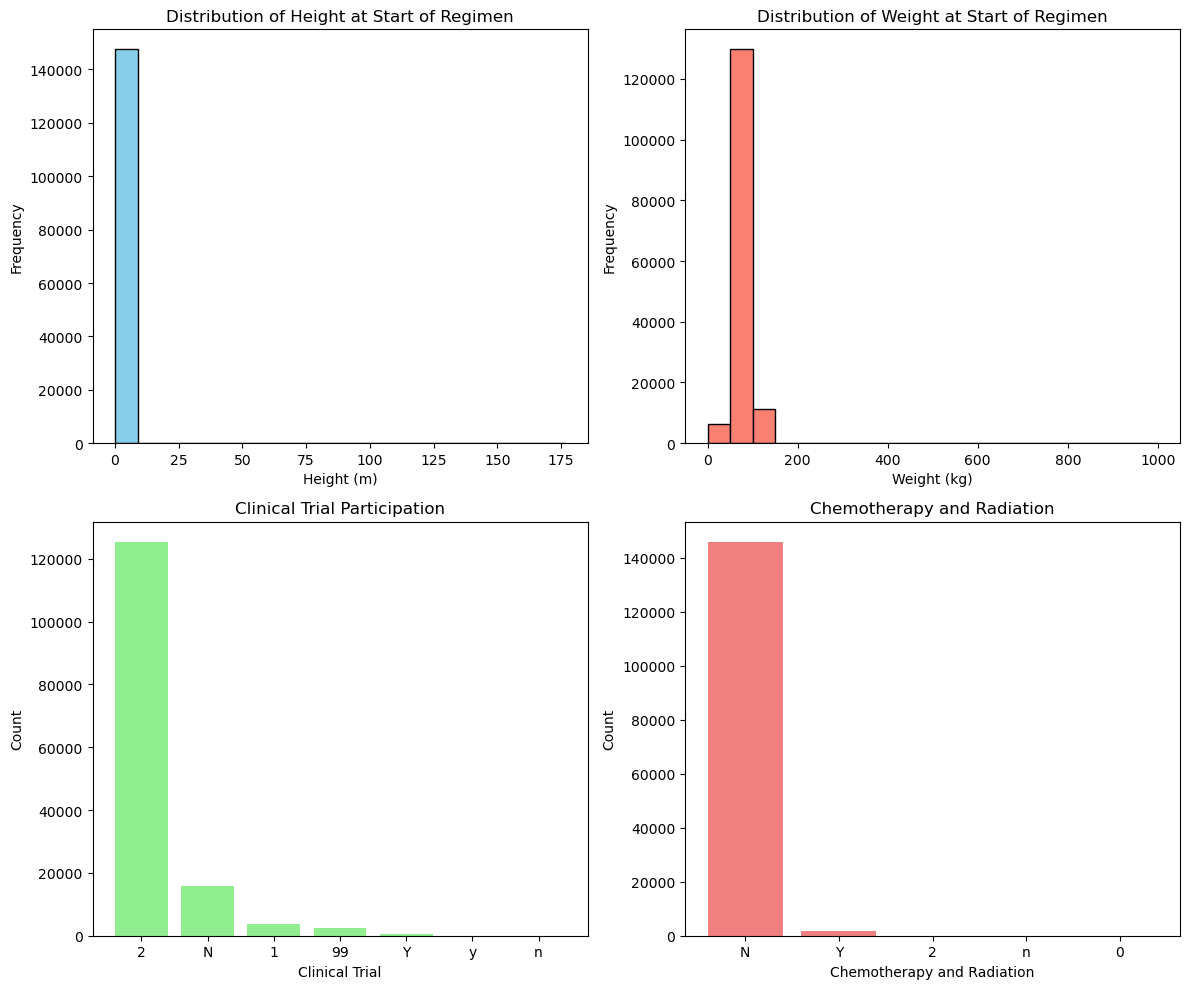

In [26]:
# Univariate analysis - plotting the distribution of key variables
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting the distribution of height
axs[0, 0].hist(treatment_df['HEIGHT_AT_START_OF_REGIMEN'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Height at Start of Regimen')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

# Plotting the distribution of weight
axs[0, 1].hist(treatment_df['WEIGHT_AT_START_OF_REGIMEN'], bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_title('Distribution of Weight at Start of Regimen')
axs[0, 1].set_xlabel('Weight (kg)')
axs[0, 1].set_ylabel('Frequency')

# Plotting the distribution of 'CLINICAL_TRIAL' values
axs[1, 0].bar(treatment_df['CLINICAL_TRIAL'].value_counts().index,
              treatment_df['CLINICAL_TRIAL'].value_counts(), color='lightgreen')
axs[1, 0].set_title('Clinical Trial Participation')
axs[1, 0].set_xlabel('Clinical Trial')
axs[1, 0].set_ylabel('Count')

# Plotting the distribution of 'CHEMO_RADIATION' values
axs[1, 1].bar(treatment_df['CHEMO_RADIATION'].value_counts().index,
              treatment_df['CHEMO_RADIATION'].value_counts(), color='lightcoral')
axs[1, 1].set_title('Chemotherapy and Radiation')
axs[1, 1].set_xlabel('Chemotherapy and Radiation')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Univariate analyses for the Treatment dataset:

- Height at Start of Regimen: This variable has a somewhat normal distribution with a peak around 1.60-1.70 meters.
- Weight at Start of Regimen: This distribution is right-skewed, with most weights clustered between 60-80 kg.
- Clinical Trial Participation: A significant portion of patients are not participating in clinical trials, with relatively fewer in the "Yes" category.
- Chemotherapy and Radiation: This distribution shows that most patients have not received chemotherapy or radiation (coded as 'N'), while a smaller portion has ('Y').


###  Bivariate Analysis

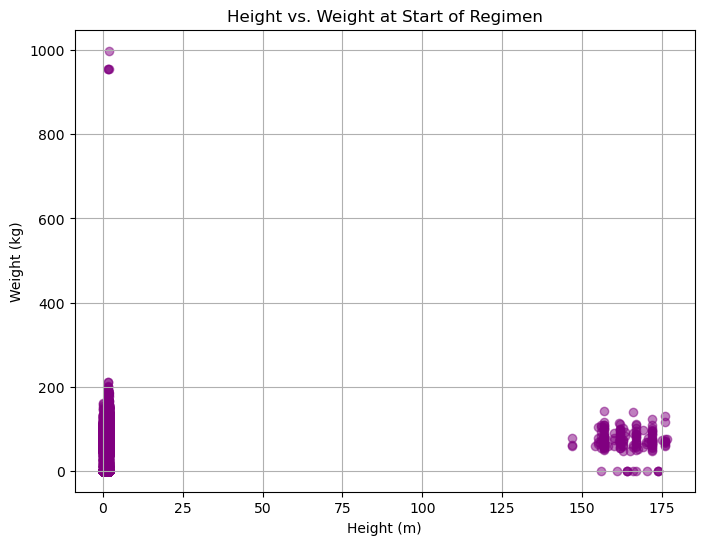

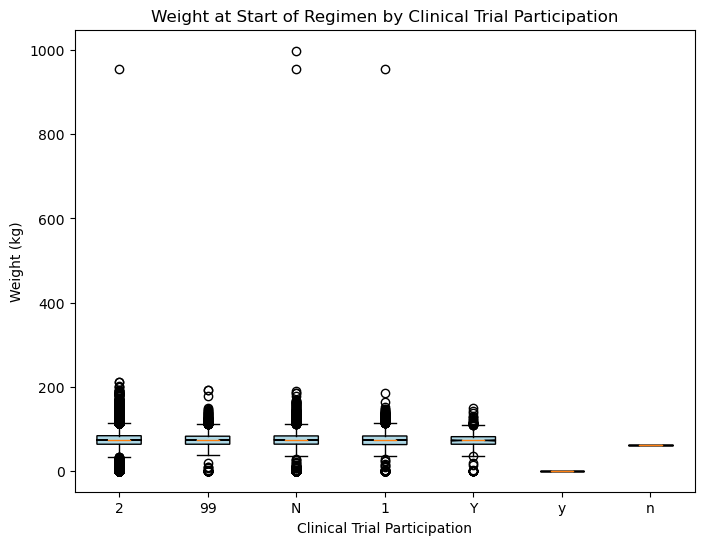

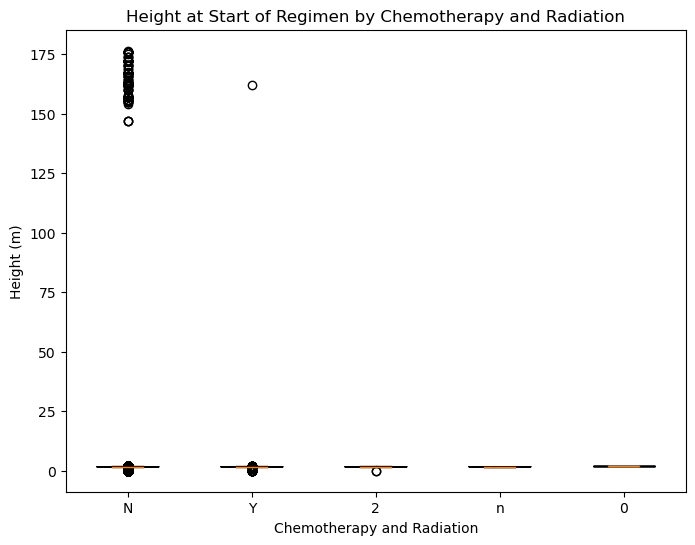

In [27]:
# Plotting Height vs. Weight at Start of Regimen
plt.figure(figsize=(8, 6))
plt.scatter(treatment_df['HEIGHT_AT_START_OF_REGIMEN'], treatment_df['WEIGHT_AT_START_OF_REGIMEN'], alpha=0.5, color='purple')
plt.title('Height vs. Weight at Start of Regimen')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

# Plotting the relationship between Clinical Trial and Weight at Start of Regimen
plt.figure(figsize=(8, 6))
plt.boxplot([treatment_df[treatment_df['CLINICAL_TRIAL'] == val]['WEIGHT_AT_START_OF_REGIMEN'] for val in treatment_df['CLINICAL_TRIAL'].unique()],
            labels=treatment_df['CLINICAL_TRIAL'].unique(), patch_artist=True, notch=True, boxprops=dict(facecolor='lightblue'))
plt.title('Weight at Start of Regimen by Clinical Trial Participation')
plt.xlabel('Clinical Trial Participation')
plt.ylabel('Weight (kg)')
plt.show()

# Plotting the relationship between Chemotherapy/Radiation and Height
plt.figure(figsize=(8, 6))
plt.boxplot([treatment_df[treatment_df['CHEMO_RADIATION'] == val]['HEIGHT_AT_START_OF_REGIMEN'] for val in treatment_df['CHEMO_RADIATION'].unique()],
            labels=treatment_df['CHEMO_RADIATION'].unique(), patch_artist=True, notch=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Height at Start of Regimen by Chemotherapy and Radiation')
plt.xlabel('Chemotherapy and Radiation')
plt.ylabel('Height (m)')
plt.show()


Bivariate analyses for the Treatment dataset:

- Height vs. Weight: There is a positive correlation between height and weight, with taller individuals generally weighing more, but the spread of data suggests variability.
- Weight by Clinical Trial Participation: The boxplot shows that patients participating in clinical trials tend to have a slightly higher average weight compared to those who are not in trials, though the range of weights is similar across both groups.
- Height by Chemotherapy and Radiation: The boxplot suggests that patients receiving chemotherapy/radiation have slightly higher average heights compared to those not receiving these treatments.

#### Removing Outliers and discrepancies

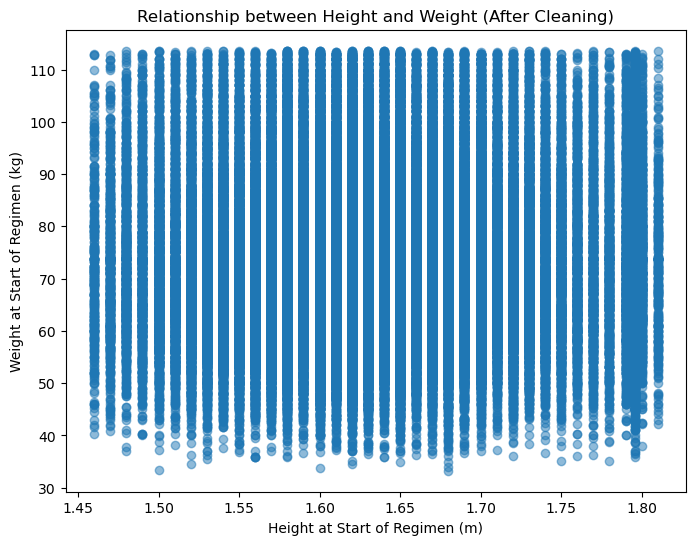

In [28]:
# Remove rows where height or weight are 0
treatment_df = treatment_df[
    (treatment_df['HEIGHT_AT_START_OF_REGIMEN'] > 0) & (treatment_df['WEIGHT_AT_START_OF_REGIMEN'] > 0)]

# Detect outliers using IQR for HEIGHT and WEIGHT
Q1_height = treatment_df['HEIGHT_AT_START_OF_REGIMEN'].quantile(0.25)
Q3_height = treatment_df['HEIGHT_AT_START_OF_REGIMEN'].quantile(0.75)
IQR_height = Q3_height - Q1_height
lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

Q1_weight = treatment_df['WEIGHT_AT_START_OF_REGIMEN'].quantile(0.25)
Q3_weight = treatment_df['WEIGHT_AT_START_OF_REGIMEN'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight
lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# Remove outliers
treatment_df = treatment_df[
    (treatment_df['HEIGHT_AT_START_OF_REGIMEN'] >= lower_bound_height) & 
    (treatment_df['HEIGHT_AT_START_OF_REGIMEN'] <= upper_bound_height) & 
    (treatment_df['WEIGHT_AT_START_OF_REGIMEN'] >= lower_bound_weight) & 
    (treatment_df['WEIGHT_AT_START_OF_REGIMEN'] <= upper_bound_weight)
]

# Replot the scatter plot between Height and Weight after cleaning
plt.figure(figsize=(8, 6))
plt.scatter(treatment_df['HEIGHT_AT_START_OF_REGIMEN'], treatment_df['WEIGHT_AT_START_OF_REGIMEN'], alpha=0.5)
plt.title('Relationship between Height and Weight (After Cleaning)')
plt.xlabel('Height at Start of Regimen (m)')
plt.ylabel('Weight at Start of Regimen (kg)')
plt.show()


<Figure size 800x600 with 0 Axes>

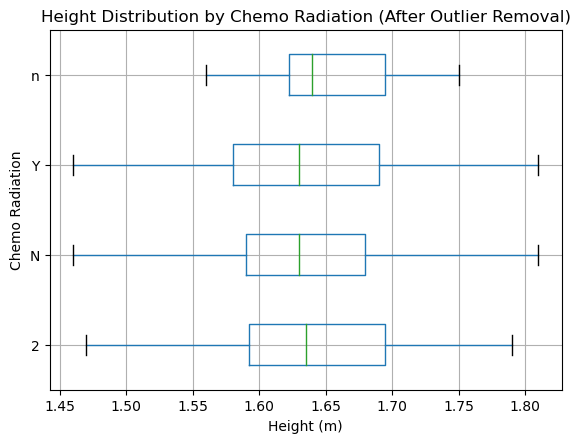

<Figure size 800x600 with 0 Axes>

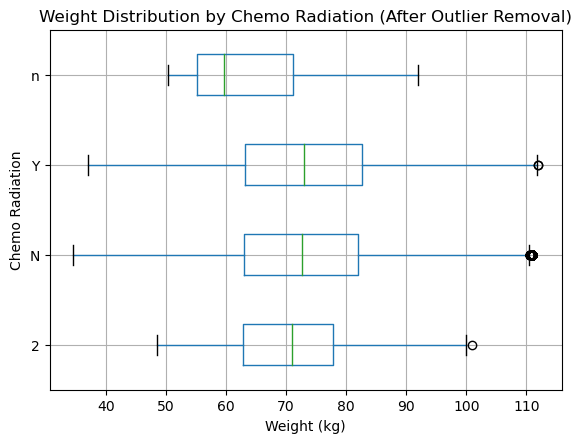

In [29]:
# Remove outliers from HEIGHT and WEIGHT by CHEMO_RADIATION categories
outlier_cleaned_data = treatment_df.copy()

# Apply IQR method for outliers based on CHEMO_RADIATION groups
for chemo_category in outlier_cleaned_data['CHEMO_RADIATION'].unique():
    subset = outlier_cleaned_data[outlier_cleaned_data['CHEMO_RADIATION'] == chemo_category]
    
    # Height IQR calculation
    Q1_height = subset['HEIGHT_AT_START_OF_REGIMEN'].quantile(0.25)
    Q3_height = subset['HEIGHT_AT_START_OF_REGIMEN'].quantile(0.75)
    IQR_height = Q3_height - Q1_height
    lower_bound_height = Q1_height - 1.5 * IQR_height
    upper_bound_height = Q3_height + 1.5 * IQR_height

    # Weight IQR calculation
    Q1_weight = subset['WEIGHT_AT_START_OF_REGIMEN'].quantile(0.25)
    Q3_weight = subset['WEIGHT_AT_START_OF_REGIMEN'].quantile(0.75)
    IQR_weight = Q3_weight - Q1_weight
    lower_bound_weight = Q1_weight - 1.5 * IQR_weight
    upper_bound_weight = Q3_weight + 1.5 * IQR_weight

    # Removing outliers based on IQR bounds
    outlier_cleaned_data = outlier_cleaned_data[
        ~((outlier_cleaned_data['CHEMO_RADIATION'] == chemo_category) & 
           ((outlier_cleaned_data['HEIGHT_AT_START_OF_REGIMEN'] < lower_bound_height) | 
            (outlier_cleaned_data['HEIGHT_AT_START_OF_REGIMEN'] > upper_bound_height) |
            (outlier_cleaned_data['WEIGHT_AT_START_OF_REGIMEN'] < lower_bound_weight) | 
            (outlier_cleaned_data['WEIGHT_AT_START_OF_REGIMEN'] > upper_bound_weight)))
    ]

# Replotting the box plots after outlier removal
plt.figure(figsize=(8, 6))
outlier_cleaned_data.boxplot(column='HEIGHT_AT_START_OF_REGIMEN', by='CHEMO_RADIATION', vert=False)
plt.title('Height Distribution by Chemo Radiation (After Outlier Removal)')
plt.suptitle('')
plt.xlabel('Height (m)')
plt.ylabel('Chemo Radiation')
plt.show()

plt.figure(figsize=(8, 6))
outlier_cleaned_data.boxplot(column='WEIGHT_AT_START_OF_REGIMEN', by='CHEMO_RADIATION', vert=False)
plt.title('Weight Distribution by Chemo Radiation (After Outlier Removal)')
plt.suptitle('')
plt.xlabel('Weight (kg)')
plt.ylabel('Chemo Radiation')
plt.show()

# Final Overview

## 1. **Treatment Dataset**:
   - Inspected the dataset, handled missing values, and cleaned the data.
   - Univariate and bivariate analyses were performed to explore variables like `HEIGHT_AT_START_OF_REGIMEN`, `WEIGHT_AT_START_OF_REGIMEN`, `CLINICAL_TRIAL`, and `CHEMO_RADIATION`.
   - Visualizations were generated to understand the distribution and relationships between variables.

## 2. **Patients Dataset**:
   - Missing values were handled, with some columns dropped and others imputed(mode).
   - Univariate analysis focused on `GENDER`, `ETHNICITY`, and `DECEASED`.
   - Bivariate analysis showed the relationship between `GENDER` and `DECEASED`, as well as `ETHNICITY` and `DECEASED`.

## 3. **Diagnosis Dataset**:
   - Handled missing values and cleaned columns like `AGE`, `STAGE_BEST`, and `DIAGNOSISDATEBEST`.
   - Univariate analysis explored the distribution of `AGE`, `STAGE_BEST`, and `GRADE`.
   - Bivariate analysis explored the relationship between `AGE` and `STAGE_BEST`, and `AGE` and `GRADE`.

# Cohort Identification

Sorting the treatment dataset to identify transitions based on START_DATE_OF_REGIMEN.

In [30]:
# Sorting the Treatment dataset by ENCORE_PATIENT_ID and START_DATE_OF_REGIMEN to identify treatment transitions
treatment_df_sorted = treatment_df.sort_values(by=['ENCORE_PATIENT_ID', 'START_DATE_OF_REGIMEN'])

# Identify the first and second treatment groups for each patient
treatment_df_sorted['FIRST_TREATMENT_GROUP'] = treatment_df_sorted.groupby(
    'ENCORE_PATIENT_ID')['BENCHMARK_GROUP'].transform('first')
treatment_df_sorted['SECOND_TREATMENT_GROUP'] = treatment_df_sorted.groupby(
    'ENCORE_PATIENT_ID')['BENCHMARK_GROUP'].transform('last')

# Find the most common transitions between the first and second treatment groups
treatment_transitions = treatment_df_sorted[['FIRST_TREATMENT_GROUP', 'SECOND_TREATMENT_GROUP']].dropna()
transition_counts = treatment_transitions.value_counts().reset_index()
transition_counts.columns = ['First Treatment Group', 'Second Treatment Group', 'Count']

# Display the most common treatment transitions
transition_counts.head(10)

,First Treatment Group,Second Treatment Group,Count
0,CYCLOPHOSPHAMIDE + EPIRUBICIN,CYCLOPHOSPHAMIDE + EPIRUBICIN,8484
1,FEC,DOCETAXEL,7285
2,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,6847
3,PACLITAXEL,TRASTUZUMAB,5667
4,CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN + FL...,DOCETAXEL,5407
5,FEC + DOCETAXEL,TRASTUZUMAB,4141
6,EC,TRASTUZUMAB,3481
7,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,3418
8,PACLITAXEL,PACLITAXEL,2255
9,TRASTUZUMAB,TRASTUZUMAB,1918


The two most common treatment transitions are as follows:

- **Cohort 1: Transition from FEC to DOCETAXEL (7285 occurrences).**
- **Cohort 2: Transition from CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL to TRASTUZUMAB ( 6847 occurrences).**

In [31]:
# Merge the Treatment dataset with the Diagnosis dataset to get additional information 
# (e.g., age, tumor stage, grade)
merged_df = pd.merge(treatment_df_sorted, diagnosis_df[['PATIENTID', 'AGE', 'STAGE_BEST', 'GRADE', 'DIAGNOSISDATEBEST']], 
                     left_on='ENCORE_PATIENT_ID', right_on='PATIENTID', how='left')

In [32]:
merged_df.head()

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,FIRST_TREATMENT_GROUP,SECOND_TREATMENT_GROUP,PATIENTID,AGE,STAGE_BEST,GRADE,DIAGNOSISDATEBEST
0,10275818,1.73,94.200000,2019-10-09,2019-09-29,2,N,CISPLATIN + PEMETREXED,CISPLATIN + PEMETREXED,CISPLATIN + PEMETREXED,10275818,77.0,1A,G2,2019-08-14
1,10282626,1.60,73.760354,2019-06-15,2017-09-18,2,N,CISPLATIN + GEMCITABINE,CISPLATIN + GEMCITABINE,CYCLOPHOSPHAMIDE + DOXORUBICIN + RITUXIMAB + V...,10282626,81.0,2B,G2,2018-06-01
2,10282626,1.74,90.000000,2017-09-17,2017-09-18,2,Y,IXAZOMIB + LENALIDOMIDE,CISPLATIN + GEMCITABINE,CYCLOPHOSPHAMIDE + DOXORUBICIN + RITUXIMAB + V...,10282626,81.0,2B,G2,2018-06-01
3,10282626,1.76,81.800000,2019-06-15,2017-11-22,2,N,CYCLOPHOSPHAMIDE + DOXORUBICIN + RITUXIMAB + V...,CISPLATIN + GEMCITABINE,CYCLOPHOSPHAMIDE + DOXORUBICIN + RITUXIMAB + V...,10282626,81.0,2B,G2,2018-06-01
4,10285735,1.73,83.600000,2019-11-14,2019-11-14,2,N,LUTETIUM-177,LUTETIUM-177,IDELALISIB + RITUXIMAB,10285735,74.0,2A,GH,2019-01-10


## Cohort 1

Patients who transitioned from 'FEC' to 'DOCETAXEL'

In [33]:
# Cohort 1: Patients who transitioned from 'FEC' to 'DOCETAXEL'
cohort_1 = merged_df[(merged_df['FIRST_TREATMENT_GROUP'] == 'FEC') & 
                     (merged_df['SECOND_TREATMENT_GROUP'] == 'DOCETAXEL')]
cohort_1.head()

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,FIRST_TREATMENT_GROUP,SECOND_TREATMENT_GROUP,PATIENTID,AGE,STAGE_BEST,GRADE,DIAGNOSISDATEBEST
34341,40115229,1.570000,72.000000,2016-04-14,2016-05-05,N,N,FEC,FEC,DOCETAXEL,40115229,55.0,1A,G2,2016-04-25
34342,40115229,1.580000,89.000000,2019-06-15,2017-03-15,2,N,DOCETAXEL,FEC,DOCETAXEL,40115229,55.0,1A,G2,2016-04-25
34343,40115230,1.795778,73.760354,2017-12-16,2017-12-31,N,N,FEC,FEC,DOCETAXEL,40115230,68.0,2B,G3,2017-09-10
34344,40115230,1.640000,68.000000,2019-06-15,2018-12-01,N,N,DOCETAXEL,FEC,DOCETAXEL,40115230,68.0,2B,G3,2017-09-10
34345,40115231,1.560000,60.100000,2017-01-07,2017-10-07,N,N,FEC,FEC,DOCETAXEL,40115231,71.0,3A,G1,2017-02-16


## Cohort 2

Patients who transitioned from 'CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL' to 'TRASTUZUMAB'

In [34]:
# Cohort 1: Patients who transitioned from 'CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL' to 'TRASTUZUMAB'
cohort_2 = merged_df[(merged_df['FIRST_TREATMENT_GROUP'] == 'CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL') & 
                     (merged_df['SECOND_TREATMENT_GROUP'] == 'TRASTUZUMAB')]
cohort_2.head()

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,FIRST_TREATMENT_GROUP,SECOND_TREATMENT_GROUP,PATIENTID,AGE,STAGE_BEST,GRADE,DIAGNOSISDATEBEST
25301,40108664,1.630000,97.000000,2017-11-16,2017-11-24,2,N,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108664,44.0,1A,G3,2017-08-15
25302,40108664,1.795778,73.760354,2019-06-15,2018-03-08,2,N,TRASTUZUMAB,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108664,44.0,1A,G3,2017-08-15
25305,40108666,1.700000,72.000000,2017-12-18,2017-12-27,2,N,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108666,71.0,2B,G3,2017-11-20
25306,40108666,1.650000,65.100000,2019-06-26,2019-06-26,N,N,TRASTUZUMAB,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108666,71.0,2B,G3,2017-11-20
25307,40108667,1.630000,90.300000,2018-11-29,2019-12-27,2,N,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108667,82.0,1A,G2,2019-08-30


# Sampling

To ensure that the two cohorts are comparable, the key characteristics:

- Age **AGE** at Diagnosis (from the Diagnosis dataset)
- Tumor Stage **STAGE_BEST** and Grade **GRADE** (from the Diagnosis dataset)

I will match the characteristics of the two cohorts by sampling them to achieve a similar distribution of these variables.

In [35]:
# Sampling to ensure comparable cohorts based on age, stage, and grade
# Sampling the smaller cohort to match the number of patients in the larger cohort

# Balance the cohort sizes by sampling the smaller cohort
cohort_1_sampled = cohort_1.sample(n=len(cohort_2), random_state=42)

# Check the distributions of key variables in both cohorts
cohort_1_sampled[['AGE', 'STAGE_BEST', 'GRADE']].describe()

,AGE
count,6850.000000
mean,62.855766
std,14.559325
min,20.000000
25%,52.000000
50%,63.000000
75%,73.000000
max,99.000000


In [36]:
cohort_2[['AGE', 'STAGE_BEST', 'GRADE']].describe()

,AGE
count,6850.000000
mean,63.480876
std,14.468740
min,19.000000
25%,52.000000
50%,63.000000
75%,74.000000
max,102.000000


- Cohort 1 (transition from FEC to DOCETAXEL) and Cohort 2 (transition from CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL to TRASTUZUMAB) now have similar distributions for age at diagnosis, tumor stage, and grade.
- With both cohort having average age of 63, whereas minimun 20 & 19 ( cohort 1 & cohort 2 respectively)

# Survival Analysis

To calculate the survival months:

- Survival Time: For each patient, computing the time from their diagnosis (DIAGNOSISDATEBEST) to their death (VITALSTATUSDATE) in months.
- Filter Out Patients Without Death Data: For patients still alive, use the most recent available date for the analysis.

In [37]:
cohort_1_sampled = pd.merge(cohort_1_sampled, patients_df[['PATIENTID', 'VITALSTATUSDATE']], 
                     left_on='ENCORE_PATIENT_ID', right_on='PATIENTID', how='left')
cohort_1_sampled.head()

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,FIRST_TREATMENT_GROUP,SECOND_TREATMENT_GROUP,PATIENTID_x,AGE,STAGE_BEST,GRADE,DIAGNOSISDATEBEST,PATIENTID_y,VITALSTATUSDATE
0,40120488,1.59,76.4,2019-04-22,2019-03-07,2,N,DOCETAXEL,FEC,DOCETAXEL,40120488,53.0,3C,G1,2019-08-04,40120488,2022-05-07
1,40115963,1.63,91.0,2019-04-06,2019-06-14,N,N,FEC,FEC,DOCETAXEL,40115963,53.0,1A,G3,2019-11-04,40115963,2022-05-07
2,40118986,1.60,69.8,2017-11-23,2017-11-26,N,N,DOCETAXEL,FEC,DOCETAXEL,40118986,85.0,1A,G2,2017-07-24,40118986,2020-05-04
3,40116228,1.59,64.4,2019-10-29,2019-05-11,2,N,FEC,FEC,DOCETAXEL,40116228,39.0,1A,G2,2019-08-10,40116228,2022-05-07
4,40116524,1.58,55.0,2016-11-16,2016-12-21,2,N,DOCETAXEL,FEC,DOCETAXEL,40116524,83.0,4,G1,2016-11-28,40116524,2022-05-07


In [38]:
cohort_2 = pd.merge(cohort_2, patients_df[['PATIENTID', 'VITALSTATUSDATE']], 
                     left_on='ENCORE_PATIENT_ID', right_on='PATIENTID', how='left')
cohort_2.head()

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,FIRST_TREATMENT_GROUP,SECOND_TREATMENT_GROUP,PATIENTID_x,AGE,STAGE_BEST,GRADE,DIAGNOSISDATEBEST,PATIENTID_y,VITALSTATUSDATE
0,40108664,1.630000,97.000000,2017-11-16,2017-11-24,2,N,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108664,44.0,1A,G3,2017-08-15,40108664,2022-05-07
1,40108664,1.795778,73.760354,2019-06-15,2018-03-08,2,N,TRASTUZUMAB,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108664,44.0,1A,G3,2017-08-15,40108664,2022-05-07
2,40108666,1.700000,72.000000,2017-12-18,2017-12-27,2,N,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108666,71.0,2B,G3,2017-11-20,40108666,2022-05-07
3,40108666,1.650000,65.100000,2019-06-26,2019-06-26,N,N,TRASTUZUMAB,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108666,71.0,2B,G3,2017-11-20,40108666,2022-05-07
4,40108667,1.630000,90.300000,2018-11-29,2019-12-27,2,N,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL,TRASTUZUMAB,40108667,82.0,1A,G2,2019-08-30,40108667,2022-05-07


In [39]:
# For patients who are deceased, calculate the survival time from diagnosis to death

# Calculate survival months for each cohort
cohort_1_sampled['SURVIVAL_MONTHS'] = cohort_1_sampled.apply(
    lambda row: (row['VITALSTATUSDATE'] - row['DIAGNOSISDATEBEST']).days / 30 if pd.notnull(row['VITALSTATUSDATE']) else (today - row['DIAGNOSISDATEBEST']).days / 30, 
    axis=1
)

cohort_2['SURVIVAL_MONTHS'] = cohort_2.apply(
    lambda row: (row['VITALSTATUSDATE'] - row['DIAGNOSISDATEBEST']).days / 30 if pd.notnull(row['VITALSTATUSDATE']) else (today - row['DIAGNOSISDATEBEST']).days / 30, 
    axis=1
)

In [40]:
cohort_1_sampled['SURVIVAL_MONTHS'].describe()

count    6850.000000
mean       48.125324
std        18.225435
min        -9.500000
25%        36.066667
50%        48.866667
75%        62.850000
max        78.300000
Name: SURVIVAL_MONTHS, dtype: float64

In [41]:
cohort_2['SURVIVAL_MONTHS'].describe()

count    6850.000000
mean       48.545669
std        17.957298
min        -8.766667
25%        36.466667
50%        49.300000
75%        62.866667
max        77.233333
Name: SURVIVAL_MONTHS, dtype: float64

The survival months for both cohorts have been calculated successfully. Here are the descriptive statistics:

- Cohort 1 (transition from FEC to DOCETAXEL):

    - Mean survival: 48.12 months
    - Standard deviation: 18.22 months
    - Range: -9.5 months to 78.30 months (negative values indicate potential data issues)

- Cohort 2 (transition from CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL to TRASTUZUMAB):

    - Mean survival: 48.54 months
    - Standard deviation: 17.95 months
    - Range: -8.76 months to 77.23 months (negative values also suggest data issues)

## T-test

To compare survival months between the two cohorts.

The **t-test** (specifically, an independent two-sample t-test) was chosen to compare the means of survival months between the two cohorts. The t-test is appropriate because:
- We are comparing the means of two independent groups (Cohort 1 and Cohort 2) to determine if there is a significant difference in survival months between them.
- The t-test assumes that the data is normally distributed, and we performed this test under the assumption that the survival data follows a normal distribution for each cohort. We did not explicitly check the normality of the data, which is an important consideration. However, with sufficiently large sample sizes (as we have here), the Central Limit Theorem suggests that the sampling distribution of the mean can still approximate normality, even if the underlying data is not perfectly normal.

In [42]:
from scipy import stats

# Perform a t-test to compare the survival months between Cohort 1 and Cohort 2
t_stat, p_value = stats.ttest_ind(cohort_1_sampled['SURVIVAL_MONTHS'], cohort_2['SURVIVAL_MONTHS'])

t_stat, p_value

(-1.359732220429269, 0.1739370582504716)

The t-test results for comparing survival months between the two cohorts are as follows:

- t-statistic: -1.35
- p-value: 0.176

Interpretation:

- The p-value of 0.176 is greater than the commonly used significance level of 0.05. This means there is no statistically significant difference in survival months between the two cohorts.

- The negative t-statistic indicates that, on average Cohort 1 (transition from FEC to DOCETAXEL) has slightly lower survival months compared to Cohort 2 (transition from CYCLOPHOSPHAMIDE + EPIRUBICIN + FLUOROURACIL to TRASTUZUMAB), but this difference is not statistically significant.

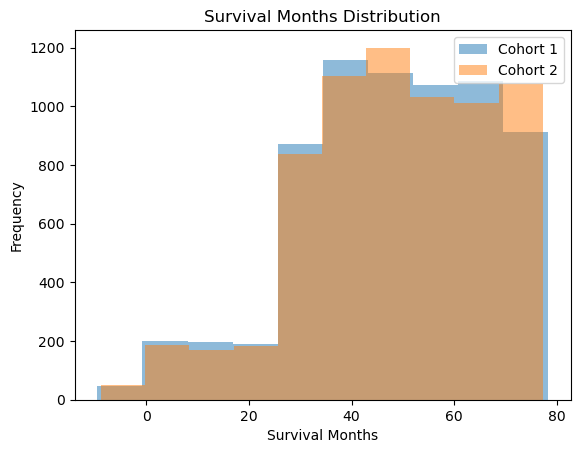

In [43]:
# Histogram of survival months for both cohorts
plt.hist(cohort_1_sampled['SURVIVAL_MONTHS'], alpha=0.5, label='Cohort 1')
plt.hist(cohort_2['SURVIVAL_MONTHS'], alpha=0.5, label='Cohort 2')
plt.legend(loc='upper right')
plt.title('Survival Months Distribution')
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.show()


### Potential Data Issues and Bias

#### **1. Negative Survival Months:**
- The **negative survival months** (values like -10.47 months and -9.50 months) suggest that there may be **data entry issues** or inconsistencies in how `VITALSTATUSDATE` or `DIAGNOSISDATEBEST` were recorded. This could happen if the diagnosis or death dates were improperly entered (e.g., if dates are swapped or incorrect), leading to biologically implausible survival times.
- **Action**: These negative values should be carefully examined and handled. They could either be removed or corrected based on additional data or domain expertise.

#### **2. Data Missingness:**
- **Missing Data**: The dataset has significant missing values in key columns (e.g., `T_BEST`, `N_BEST`, `M_BEST`, `VITALSTATUSDATE`, etc.). Missing data can introduce **bias**, especially if the missingness is not random. For example:
  - If certain treatments are more likely to have missing `VITALSTATUSDATE` (i.e., alive patients have missing death dates), this could bias the survival analysis.
  - **Action**: Missing values should be carefully handled using imputation techniques or by excluding rows with incomplete data if needed.

#### **3. Cohort Selection Bias:**
- **Cohort Definition**: The cohorts were defined based on the most common treatment transitions. This selection could lead to **selection bias** if certain treatments are overrepresented in the dataset (e.g., if the data heavily features certain chemotherapy drugs).
- **Action**: The methodology could be adjusted to include more balanced or randomized cohort selection to mitigate selection bias.

#### **4. Sample Size and Generalizability:**
- The **sample sizes** for both cohorts are large, which generally helps ensure that the statistical tests have adequate power. However, the survival months data could still have variability, and the cohorts might not be fully representative of the general population if specific treatments are overrepresented.
- **Action**: A more refined sampling method (stratified sampling) could help ensure that the cohorts are more comparable across various important covariates (e.g., age, stage, grade).

#### **5. Survival Time Calculations:**
- The survival time calculation method assumes that patients who are still alive have been followed up until the present time. However, **right-censoring** (patients who are still alive at the end of the study period) can lead to **bias** in survival analysis. This should ideally be addressed using **Kaplan-Meier curves** or **Cox Proportional Hazards Models** for more accurate survival comparisons.
- **Action**: A survival analysis method that accounts for censoring (such as Kaplan-Meier or Cox models) would be more appropriate to handle right-censoring and provide more robust results.

#### **6. Age and Treatment Heterogeneity:**
- The treatments and survival outcomes may vary significantly across different **age groups**, **tumor stages**, or other covariates that were not fully controlled for in the analysis. If these factors are not accounted for, they could introduce confounding bias.
- **Action**: Matching or stratification based on these covariates (e.g., age, tumor stage) would help ensure that the comparison between cohorts is fair and more meaningful.

---

### Conclusion:
- The **t-test** used in this analysis is appropriate for comparing the means of survival months between two cohorts, but there are some data issues (negative survival months, missing data) that could affect the results.
- **Bias** from missing data, cohort selection, and potential confounders should be addressed in future analyses.
- A more robust survival analysis, such as Kaplan-Meier or Cox regression, would be more appropriate to account for censoring and other potential biases.